
# Customizing Matplotlib with style sheets and rcParams


自定义Matplotlib属性和默认样式。

有三种方法可以自定义Matplotlib：

- :ref: 在 runtime<customizing-with-dynamic-rc-settings> 中设置 rcParams
- :ref: 使用 style sheets<customizing-with-style-sheets>
- :ref: 改变 matplotlibrc file<customizing-with-matplotlibrc-files>
    
在 runtime 设置 rcParams 优先于 style sheets， style sheets 优先于 file:`matplotlibrc` 文件
   

## Runtime rc settings

你可以在 python scripts 或者 python shell 中动态更改默认 rc(runtime configuration) 设置。 所有的 rc 设置以一种类似于字典变量存储在 `matplotlib.rcParams`， 其为全局变量。
    
rcParams 可以直接修改：

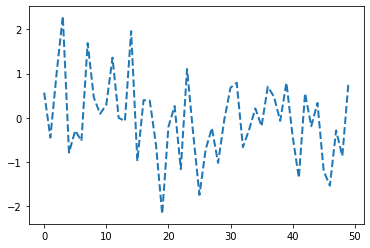

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
data = np.random.randn(50)
plt.plot(data)

注意， 为了改变 `~.Axes.plot` 的颜色， 你需要改变 `axes` 的 `prop_cycle` 属性：

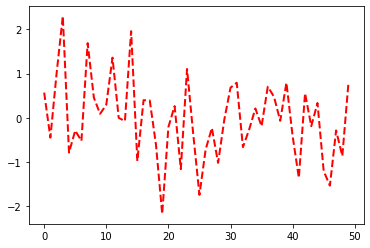

In [4]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.plot(data) # first color is red

Matplotlib 提供了几个方便的函数修改 rc 设置。 `matplotlib.rc` 可以使用参数在单个组中一次性被修改多个 settings

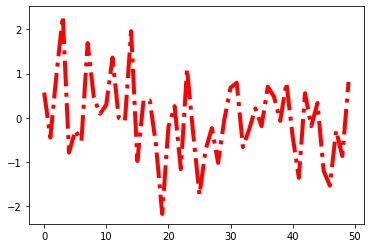

In [5]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

## Temporary rc settings

`matplotlib.rcParams` 对象可以使用 `matplotlib.rc_context` 上下文管理器暂时修改：

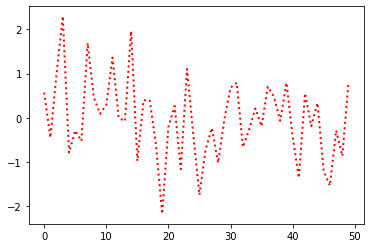

In [6]:
with mpl.rc_context({'lines.linewidth':2, 'lines.linestyle': ':'}):
    plt.plot(data)

`matplotlib.rc_context` 也可以用作装饰器修改一个函数的默认行为：

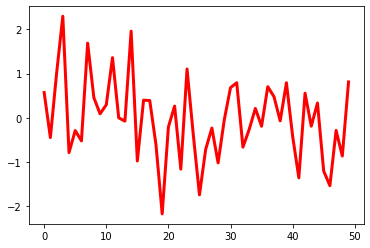

In [9]:
@mpl.rc_context({'lines.linewidth':3, 'lines.linestyle':'-'})
def plotting_function():
    plt.plot(data)
    
plotting_function()

`matplotlib.rcdefaults` 将会存储标准的 matplotlib 默认设置

## Using style sheets

另外一种改变 plots 的视觉效果的方式是在 style sheet 设置 rcParams 并且用 `matplotlib.style.use` 导入 style sheet。

这种方法你可以通过改变导入的 style sheet 轻松地切换不同的 styles。 style sheets 看起来和 `matplotlibrc<matplotlibrc-sample>` 文件一样， 但是在 style sheet 中你可以仅设置 与实际 plot 的 style 相关的 rcParams。 其他的 rcParams， 如 `backend`， 将会被忽略。

`matplotlibrc` 文件支持所有的 rcParams。 其背后的理由是使得 style sheets 可以在不同的机器之间不用担心依赖问题。 对于完整的 rcParams 的完整列表见 `matplotlib.rcParams`。 style sheets 中的被忽视的 rcParams 列表见 `matplotlib.style.use`。 

有大量被预定义的 styles: doc:`provided by Matplotlib </gallery/style_sheets/style_sheets_reference>`。

有一个名为“ggplot”的预定义样式，它模拟了 ggplot_ 的美学 (R 语言中的一种绘图包)， 要使用这种风格：

In [10]:
plt.style.use('ggplot')

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Defining your own style

你可以通过调用 `.style.use` 床垫自定义的 styles。

例如， 你可能想要创建 `./images/presentation.mplstyle`：

- axes.titlesize : 24
- axes.labelsize : 20
- lines.linewidth : 3
- lines.markersize : 10
- xtick.labelsize : 16
- ytick.labelsize : 16

然后， 当你想要为某 paper 采用一种 plot 设计时：

```
>>> import matplotlib.pyplot as plt
>>> plt.style.use('./images/presentation.mplstyle')
```

你可以通过将 `<style-name>.mplstyle` 变为 `mpl_configdir/stylelib` 制作你的 style。

你可以调用 `style.use(<style-name>)` 载入你的自定义 style sheet。 默认的 `mpl_configdir` 应该为 `~/.config/matplotlib`， 但是你可以使用 `matplotlib.get_configdir()` 检查。


## Composing styles

Style sheets 可以组合设计。 因此你可以使用一个 style sheet 自定义颜色， 另一个 style sheet 改变 elementsize。 这些 styles 可以通过传入 styles 的列表组合：

```
>>> import matplotlib.pyplot as plt
>>> plt.style.use(['dark_background', 'presentation'])
```

注意， 右边的 styles 将会覆盖掉左边定义的 styles。

## Temporary styling

如果你不想修改全局的 styling， 但是想为指定代码块使用一种 style， 可以使用 style 的上下文管理器。 

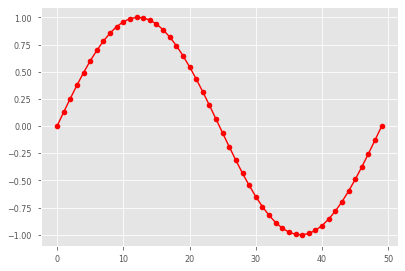

In [21]:
with plt.style.context('seaborn-paper'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

## The :file:`matplotlibrc` file

matplotlib 使用 `matplotlibrc` 配置文件自定义所有种类的属性， 其叫做 `rc settings` 或者 `rc parameters`。 你可以控制 matplotlib 的每个属性的默认值： figure size 和 DPI, line width, color 和 style, axes, axis 和 grid properties, text 和 font properties  等等. `matloblibrc` 在配置 matplotlib 开始时读取。 matplotlib 在按以下顺序查找四个位置：

- `matplotlibrc` 在当前工作目录
- `$MATPLOTLIBRC` 如果其是一个文件

显示当前使用的 `matplotlibrc`：

```
>>> import matplotlib
>>> matplotlib.matplotlib_fname()
'/home/foo/.config/matplotlib/matplotlibrc'
```